# Monitor the training process

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("https://zenodo.org/record/5071376/files/weather_prediction_dataset_light.csv?download=1")

![](https://carpentries-incubator.github.io/deep-learning-intro/fig/03_weather_prediction_dataset_map.png)

In [3]:
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [4]:
data.shape

(3654, 91)

In [5]:
89

89

In [13]:
{s.split('_')[-1] for s in data.columns if s not in ['MONTH', 'DATE']}

{'cover',
 'humidity',
 'max',
 'mean',
 'min',
 'precipitation',
 'pressure',
 'radiation',
 'sunshine'}

## Define the problem

In [16]:
nr_rows = 365*3

X_data = data.loc[:nr_rows].drop(columns=['DATE', 'MONTH'])
y_data = data.loc[1:(nr_rows + 1)]['BASEL_sunshine']



In [17]:
data.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,...,-4.626327,-6.884319,-2.352244,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,...,6.987080,7.120333,6.972886,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,...,-26.600000,-30.300000,-24.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,2.002070e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,...,-9.400000,-11.800000,-7.100000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,2.004567e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,...,-4.400000,-6.400000,-2.200000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,...,0.700000,-1.100000,2.700000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,...,13.800000,8.700000,14.300000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_holdout, y_train, y_holdout = train_test_split(X_data, y_data, \
                                                          test_size=0.3, \
                                                          random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, \
                                                          test_size=0.5, \
                                                          random_state=0)
                                                          

- Training set: training the neural network
- Test set: evaluating the trained neural network
- Validation set: monitor the neural network

In [20]:
365*3

1095

In [21]:
4/36
0.5

0.1111111111111111

In [ ]:


X_train, X_holdout ... = train_test_split( ..., test_size = (4./36.), ...)
X_val, X_test ... = train_test_split( X_holdout, y_holdout,..., test_size = .5, ...)


In [22]:
from numpy.random import seed

seed(1)

from tensorflow.random import set_seed
set_seed(2)

In [25]:
(5-4)^2

3

In [ ]:
Mean squared error

In [26]:
def relu(x):
    return max(0, x)

In [30]:
from tensorflow import keras

def create_nn():
    # Input layer
    inputs = keras.Input(shape=(X_data.shape[1],), name='input')
    
    # Hidden layers (dense)
    layers_hidden = keras.layers.Dense(100, 'relu')(inputs)
    layers_hidden = keras.layers.Dense(50, 'relu')(layers_hidden)
    
    # Output layer
    outputs = keras.layers.Dense(1)(layers_hidden)
    
    return keras.Model(inputs=inputs, outputs=outputs, \
                       name='weather_prediction_model')
    
model = create_nn()    

2022-01-26 12:01:16.145768: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
model.summary()

Model: "weather_prediction_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 89)]              0         
_________________________________________________________________
dense (Dense)                (None, 100)               9000      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 14,101
Trainable params: 14,101
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='mse', \
              optimizer='adam', \
              metrics=[keras.metrics.RootMeanSquaredError()])

In [34]:
history = model.fit(X_train, y_train, 
                    batch_size=32,
                    epochs=200,
                    verbose=2)
                    

2022-01-26 12:25:58.300481: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
24/24 - 1s - loss: 25.2525 - root_mean_squared_error: 5.0252
Epoch 2/200
24/24 - 0s - loss: 14.2598 - root_mean_squared_error: 3.7762
Epoch 3/200
24/24 - 0s - loss: 12.5559 - root_mean_squared_error: 3.5434
Epoch 4/200
24/24 - 0s - loss: 12.0312 - root_mean_squared_error: 3.4686
Epoch 5/200
24/24 - 0s - loss: 11.8579 - root_mean_squared_error: 3.4435
Epoch 6/200
24/24 - 0s - loss: 11.1998 - root_mean_squared_error: 3.3466
Epoch 7/200
24/24 - 0s - loss: 11.0822 - root_mean_squared_error: 3.3290
Epoch 8/200
24/24 - 0s - loss: 10.9917 - root_mean_squared_error: 3.3154
Epoch 9/200
24/24 - 0s - loss: 10.6229 - root_mean_squared_error: 3.2593
Epoch 10/200
24/24 - 0s - loss: 10.6816 - root_mean_squared_error: 3.2683
Epoch 11/200
24/24 - 0s - loss: 10.4945 - root_mean_squared_error: 3.2395
Epoch 12/200
24/24 - 0s - loss: 10.2068 - root_mean_squared_error: 3.1948
Epoch 13/200
24/24 - 0s - loss: 9.9087 - root_mean_squared_error: 3.1478
Epoch 14/200
24/24 - 0s - loss: 10.0791 - root_m

Text(0, 0.5, 'RMSE')

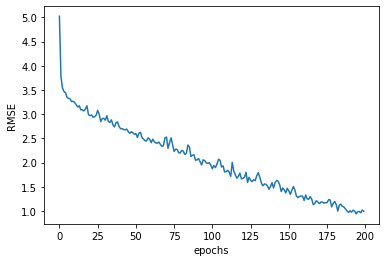

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df['root_mean_squared_error'])
plt.xlabel("epochs")
plt.ylabel("RMSE")

In [36]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

Text(0, 0.5, 'true sunshine hours')

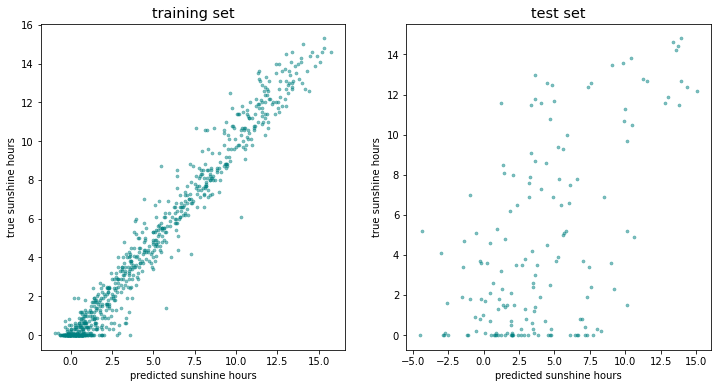

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.style.use('ggplot')  # optional, that's only to define a visual style
axes[0].scatter(y_train_predicted, y_train, s=10, alpha=0.5, color="teal")
axes[0].set_title("training set")
axes[0].set_xlabel("predicted sunshine hours")
axes[0].set_ylabel("true sunshine hours")

axes[1].scatter(y_test_predicted, y_test, s=10, alpha=0.5, color="teal")
axes[1].set_title("test set")
axes[1].set_xlabel("predicted sunshine hours")
axes[1].set_ylabel("true sunshine hours")


In [38]:
loss_train, rmse_train = model.evaluate(X_train, y_train)
loss_test, rmse_test = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 16.4413 - root_mean_squared_error: 4.0548


- Creating a baseline prediction
- Evaluate validation data during training
- Learn some methods to avoid overfitting